### PART I:

## EDA & Data Preprocessing on Google App Store Rating Dataset.
### Domain: Mobile device apps

### Context:
The Play Store apps data has enormous potential to drive app-making businesses to success. However, many
apps are being developed every single day and only a few of them become profitable. It is important for
developers to be able to predict the success of their app and incorporate features which makes an app
successful. Before any such predictive-study can be done, it is necessary to do EDA and data-preprocessing on
the apps data available for google app store applications. From the collected apps data and user ratings from
the app stores, let's try to extract insightful information.

## Objective:
The Goal is to explore the data and pre-process it for future use in any predictive analytics study.

## Data set Information:
Web scraped data of 10k Play Store apps for analyzing the Android market. Each app (row) has values for
category, rating, size, and more.

### 1. Import required libraries and read the dataset.


In [329]:
# importing required libraries.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib .pyplot as plt

In [330]:
# Reading the dataset
df=pd.read_csv("Apps_data+(1).csv")
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


### 2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features.


In [331]:
# Top 5 Rows of the dataset.
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [332]:
# Bottom 5 Rows of the dataset.
df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [333]:
# Shape of the dataset
df.shape

(10841, 13)

In [334]:
# Basic information about data and it's dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


### 3. Check summary statistics of the dataset. List out the columns that need to be worked upon for model building.

In [335]:
df.describe(include="all")

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,9367.000000,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,NaN,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,NaN,596,1695,1579,10039,10040,8714,842,326,1459,2451
mean,NaN,NaN,4.193338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.537431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [336]:
print("The Features that are required to be worked upon for model building are : ")
print("Rating")
print("Type")
print("Content Rating")
print("Price")
print("Category")
print("Reviews")

The Features that are required to be worked upon for model building are : 
Rating
Type
Content Rating
Price
Category
Reviews


### 4. Check if there are any duplicate records in the dataset? if any drop them.

In [337]:
#checking duplicate Records
duplicates = df[df.duplicated()]
duplicates

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,Wunderlist: To-Do List & Tasks,PRODUCTIVITY,4.6,404610,Varies with device,"10,000,000+",Free,0,Everyone,Productivity,"April 6, 2018",Varies with device,Varies with device
8654,"TickTick: To Do List with Reminder, Day Planner",PRODUCTIVITY,4.6,25370,Varies with device,"1,000,000+",Free,0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
8658,ColorNote Notepad Notes,PRODUCTIVITY,4.6,2401017,Varies with device,"100,000,000+",Free,0,Everyone,Productivity,"June 27, 2018",Varies with device,Varies with device
10049,Airway Ex - Intubate. Anesthetize. Train.,MEDICAL,4.3,123,86M,"10,000+",Free,0,Everyone,Medical,"June 1, 2018",0.6.88,5.0 and up


In [338]:
# Dropping all the duplicate records 
df.drop_duplicates(inplace=True)

In [339]:
df.shape

(10358, 13)

### 5. Check the unique categories of the column 'Category', Is there any invalid category? If yes, drop them.

In [340]:
# unique categories from Category Column
df.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [341]:
invalid = df[df["Category"] == "1.9"]
invalid


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [342]:
#Dropping invalid Category
df.drop(10472, inplace=True)

In [343]:
print(df.shape)
df.Category.unique()

(10357, 13)


array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

### 6. Check if there are missing values present in the column Rating, If any? drop them and and create a new column as 'Rating_category' by converting ratings to high and low categories(>3.5 is high rest low)


In [344]:
df.isnull().sum()


App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [345]:
print(df.shape[0])
print("Missing values present in the column Rating is :",df.Rating.isna().sum())

10357
Missing values present in the column Rating is : 1465


In [346]:
null_rating = df[df["Rating"].isnull()].index
null_rating

Int64Index([   23,   113,   123,   126,   129,   130,   134,   163,   180,
              185,
            ...
            10816, 10818, 10821, 10822, 10823, 10824, 10825, 10831, 10835,
            10838],
           dtype='int64', length=1465)

In [347]:
# Dropping records with null rating
df.drop(null_rating, inplace=True)

In [348]:
df.shape

(8892, 13)

In [349]:
rows=df.shape[0]
columns=df.shape[1]
print(rows,columns)
print("The Data after dropping the rows having null Ratings consists of 8892 rows and  13 columns")

8892 13
The Data after dropping the rows having null Ratings consists of 8892 rows and  13 columns


In [350]:
#creating a new column as'Rating_category'
def Rating_category(x):
    if x <= 3.5:
        return "Low"
    elif x > 3.5:
        return "High"
    
df["Rating_category"] = df['Rating'].map(Rating_category)
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,High
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,High
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,High
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,High
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,High


### 7. Check the distribution of the newly created column 'Rating_category' and comment on the distribution.

In [351]:
distribution_data= df["Rating_category"].value_counts()
distribution_data

High    8012
Low      880
Name: Rating_category, dtype: int64

Text(0.5, 1.0, 'Distribution of Rating_category')

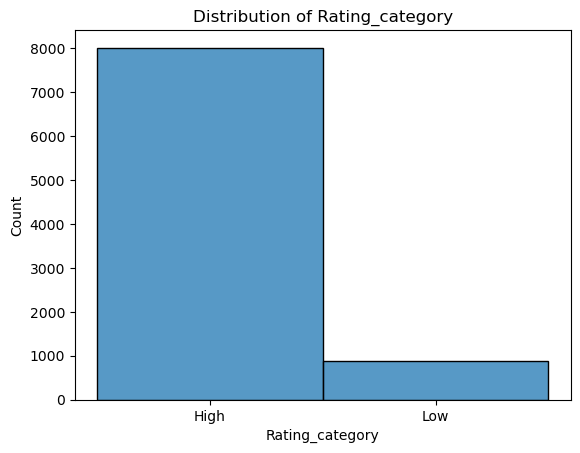

In [352]:
sns.histplot(df,x="Rating_category")
plt.title("Distribution of Rating_category")

### comment on the distribution

This distribution suggests that the 'Rating_category' column has two categories: "High" and "Low." 
The majority of the apps fall into the "High" rating category, with 8012 apps in this category.
and there are significantly fewer apps in the "Low" rating category, with only 880 apps.
This indicates that most of the apps in the dataset have relatively high ratings, while only a small number have low ratings.So,we need to be careful when building models to make sure they work well for both types of apps.
   



### 8. Convert the column "Reviews'' to numeric data type and check the presence of outliers in the column and handle the outliers using a transformation approach.(Hint: Use log transformation)

In [353]:
print(type(df["Reviews"]))
df["Reviews"].dtypes

<class 'pandas.core.series.Series'>


dtype('O')

In [354]:
# Changing the datatype to integer 
df["Reviews"] = df["Reviews"].astype(int)
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,High
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,High
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,High
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,High
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up,High
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,High
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up,High
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device,High


In [355]:
print(df.dtypes["Reviews"])
df["Reviews"]

int32


0           159
1           967
2         87510
3        215644
4           967
          ...  
10834         7
10836        38
10837         4
10839       114
10840    398307
Name: Reviews, Length: 8892, dtype: int32

<Figure size 400x500 with 0 Axes>

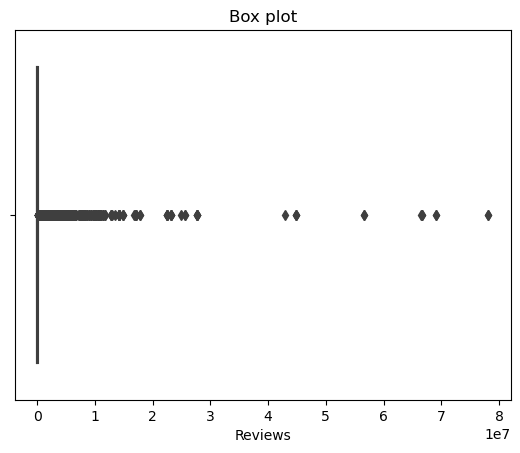

<Figure size 400x500 with 0 Axes>

In [356]:
sns.boxplot(df,x="Reviews")
plt.title("Box plot")
plt.xlabel("Reviews")
plt.figure(figsize=(4,5))



In [357]:
# Applying Log Transformation to the column 
log10 = np.log10(df["Reviews"])
log10.describe()

count    8892.000000
mean        3.576368
std         1.685149
min         0.000000
25%         2.214844
50%         3.673435
75%         4.852887
max         7.892975
Name: Reviews, dtype: float64

<Figure size 50x100 with 0 Axes>

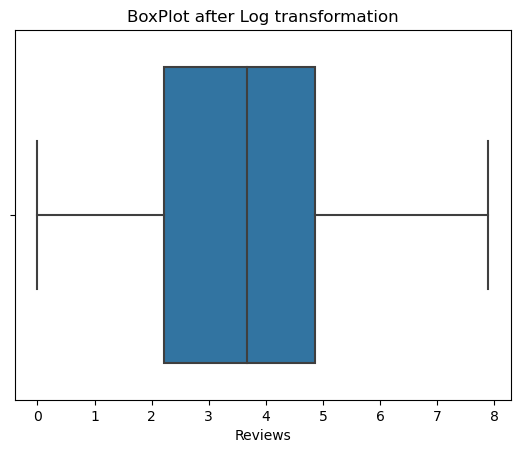

<Figure size 50x100 with 0 Axes>

In [358]:
sns.boxplot(x=log10)
plt.title("BoxPlot after Log transformation")
plt.xlabel("Reviews")
plt.figure(figsize=(0.5,1.0))

In [359]:
df["Reviews"] = log10

In [360]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,2.201397,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,High
1,Coloring book moana,ART_AND_DESIGN,3.9,2.985426,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,High
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,4.942058,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,High
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,5.333737,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,High
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,2.985426,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,High


#### Observation
Above boxplot that shows the distribution of log-transformed Reviews. After changing the datatype of Reviews column from object to int datatype and applying the Log Transformation to analyze and handle any outliers.It suggests that the log transformation has successfully handled any outliers in the Reviews column,making the data more suitable for analysis. 

### 9. The column 'Size' contains alphanumeric values, treat the non numeric data and convert the column into suitable data type. (hint: Replace M with 1 million and K with 1 thousand, and drop the entries where size='Varies with device')

In [361]:
df["Size"]

0                       19M
1                       14M
2                      8.7M
3                       25M
4                      2.8M
                ...        
10834                  2.6M
10836                   53M
10837                  3.6M
10839    Varies with device
10840                   19M
Name: Size, Length: 8892, dtype: object

In [362]:
df["Size"] = df["Size"].apply(lambda x : x.replace(",",""))
# Replacing alphabetical to numerical
df["Size"] = df["Size"].str.replace("M","000000")
df["Size"] = df["Size"].str.replace("k","000")

In [363]:
#The idexes of records having Size"Varies_with_device".
Varies_with_device = df[df["Size"] == "Varies with device"].index
Varies_with_device

Int64Index([   37,    42,    52,    67,    68,    73,    85,    88,    89,
               92,
            ...
            10647, 10679, 10681, 10707, 10712, 10713, 10725, 10765, 10826,
            10839],
           dtype='int64', length=1468)

In [364]:
#dropping records having Size "Varies_with_device".
df.drop(Varies_with_device,inplace=True)

In [365]:
print(df.shape)
df.shape[0]

(7424, 14)


7424

In [366]:
df["Size"].convert_dtypes()

0         19000000
1         14000000
2        8.7000000
3         25000000
4        2.8000000
           ...    
10833       619000
10834    2.6000000
10836     53000000
10837    3.6000000
10840     19000000
Name: Size, Length: 7424, dtype: string

### 10. Check the column 'Installs', treat the unwanted characters and convert the column into a suitable data type.


In [367]:
df["Installs"]

0            10,000+
1           500,000+
2         5,000,000+
3        50,000,000+
4           100,000+
            ...     
10833         1,000+
10834           500+
10836         5,000+
10837           100+
10840    10,000,000+
Name: Installs, Length: 7424, dtype: object

In [368]:
#Replacing the Unwanted Characters 
df["Installs"] = df["Installs"].str.replace("+","").replace(",","")

C:\Users\Shri\AppData\Local\Temp\ipykernel_39212\985775180.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["Installs"] = df["Installs"].str.replace("+","").replace(",","")


In [369]:
df["Installs"]

0            10,000
1           500,000
2         5,000,000
3        50,000,000
4           100,000
            ...    
10833         1,000
10834           500
10836         5,000
10837           100
10840    10,000,000
Name: Installs, Length: 7424, dtype: object

In [370]:
df["Installs"].convert_dtypes()

0            10,000
1           500,000
2         5,000,000
3        50,000,000
4           100,000
            ...    
10833         1,000
10834           500
10836         5,000
10837           100
10840    10,000,000
Name: Installs, Length: 7424, dtype: string

In [371]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,2.201397,19000000,"10,000",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,High
1,Coloring book moana,ART_AND_DESIGN,3.9,2.985426,14000000,"500,000",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,High
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,4.942058,8.7000000,"5,000,000",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,High
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,5.333737,25000000,"50,000,000",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,High
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,2.985426,2.8000000,"100,000",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,High


### 11. Check the column 'Price',remove the unwanted characters and convert the column into a suitable data type.


In [372]:
df['Price']

0        0
1        0
2        0
3        0
4        0
        ..
10833    0
10834    0
10836    0
10837    0
10840    0
Name: Price, Length: 7424, dtype: object

In [373]:
df['Price'].unique()

array(['0', '$4.99', '$6.99', '$7.99', '$3.99', '$5.99', '$2.99', '$1.99',
       '$9.99', '$0.99', '$9.00', '$5.49', '$10.00', '$24.99', '$11.99',
       '$79.99', '$16.99', '$14.99', '$29.99', '$12.99', '$3.49',
       '$10.99', '$7.49', '$1.50', '$19.99', '$15.99', '$33.99', '$39.99',
       '$2.49', '$4.49', '$1.70', '$1.49', '$3.88', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$1.59',
       '$6.49', '$1.29', '$299.99', '$379.99', '$37.99', '$18.99',
       '$389.99', '$8.49', '$1.75', '$14.00', '$2.00', '$3.08', '$2.59',
       '$19.40', '$15.46', '$8.99', '$3.04', '$13.99', '$4.29', '$3.28',
       '$4.60', '$1.00', '$2.90', '$1.97', '$2.56', '$1.20'], dtype=object)

In [374]:
df["Price"] = df["Price"].apply(lambda x : x.replace(",",""))
#Replacing the Unwanted Characters 
df["Price"] = df["Price"].str.replace("$", "")

C:\Users\Shri\AppData\Local\Temp\ipykernel_39212\10056298.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["Price"] = df["Price"].str.replace("$", "")


In [375]:
df['Price'].unique()

array(['0', '4.99', '6.99', '7.99', '3.99', '5.99', '2.99', '1.99',
       '9.99', '0.99', '9.00', '5.49', '10.00', '24.99', '11.99', '79.99',
       '16.99', '14.99', '29.99', '12.99', '3.49', '10.99', '7.49',
       '1.50', '19.99', '15.99', '33.99', '39.99', '2.49', '4.49', '1.70',
       '1.49', '3.88', '399.99', '17.99', '400.00', '3.02', '1.76',
       '4.84', '4.77', '1.61', '1.59', '6.49', '1.29', '299.99', '379.99',
       '37.99', '18.99', '389.99', '8.49', '1.75', '14.00', '2.00',
       '3.08', '2.59', '19.40', '15.46', '8.99', '3.04', '13.99', '4.29',
       '3.28', '4.60', '1.00', '2.90', '1.97', '2.56', '1.20'],
      dtype=object)

In [376]:
df["Price"].convert_dtypes()

0        0
1        0
2        0
3        0
4        0
        ..
10833    0
10834    0
10836    0
10837    0
10840    0
Name: Price, Length: 7424, dtype: string

### 12. Drop the columns which you think redundant for the analysis.(suggestion: drop column 'rating', since we created a new feature from it (i.e. rating_category) and the columns 'App', 'Rating' ,'Genres','Last Updated','Current Ver','Android Ver' columns since which are redundant for our analysis)

In [377]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Rating_category'],
      dtype='object')

In [378]:
# Dropping the redundant columns from the datset.
df.drop(["App","Rating","Genres","Last Updated","Current Ver","Android Ver"], axis = 1,inplace = True)

In [379]:
df.head()

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_category
0,ART_AND_DESIGN,2.201397,19000000,"10,000",Free,0,Everyone,High
1,ART_AND_DESIGN,2.985426,14000000,"500,000",Free,0,Everyone,High
2,ART_AND_DESIGN,4.942058,8.7000000,"5,000,000",Free,0,Everyone,High
3,ART_AND_DESIGN,5.333737,25000000,"50,000,000",Free,0,Teen,High
4,ART_AND_DESIGN,2.985426,2.8000000,"100,000",Free,0,Everyone,High


### 13. Encode the categorical columns.


In [380]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7424 entries, 0 to 10840
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Category         7424 non-null   object 
 1   Reviews          7424 non-null   float64
 2   Size             7424 non-null   object 
 3   Installs         7424 non-null   object 
 4   Type             7424 non-null   object 
 5   Price            7424 non-null   object 
 6   Content Rating   7424 non-null   object 
 7   Rating_category  7424 non-null   object 
dtypes: float64(1), object(7)
memory usage: 522.0+ KB


In [381]:
df.Category.nunique()

33

In [382]:
categories = list(df["Category"].unique())
categories

['ART_AND_DESIGN',
 'AUTO_AND_VEHICLES',
 'BEAUTY',
 'BOOKS_AND_REFERENCE',
 'BUSINESS',
 'COMICS',
 'COMMUNICATION',
 'DATING',
 'EDUCATION',
 'ENTERTAINMENT',
 'EVENTS',
 'FINANCE',
 'FOOD_AND_DRINK',
 'HEALTH_AND_FITNESS',
 'HOUSE_AND_HOME',
 'LIBRARIES_AND_DEMO',
 'LIFESTYLE',
 'GAME',
 'FAMILY',
 'MEDICAL',
 'SOCIAL',
 'SHOPPING',
 'PHOTOGRAPHY',
 'SPORTS',
 'TRAVEL_AND_LOCAL',
 'TOOLS',
 'PERSONALIZATION',
 'PRODUCTIVITY',
 'PARENTING',
 'WEATHER',
 'VIDEO_PLAYERS',
 'NEWS_AND_MAGAZINES',
 'MAPS_AND_NAVIGATION']

In [383]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df["Category"] = labelencoder.fit_transform(df["Category"])

In [384]:
df

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_category
0,0,2.201397,19000000,"10,000",Free,0,Everyone,High
1,0,2.985426,14000000,"500,000",Free,0,Everyone,High
2,0,4.942058,8.7000000,"5,000,000",Free,0,Everyone,High
3,0,5.333737,25000000,"50,000,000",Free,0,Teen,High
4,0,2.985426,2.8000000,"100,000",Free,0,Everyone,High
...,...,...,...,...,...,...,...,...
10833,3,1.643453,619000,"1,000",Free,0,Everyone,High
10834,11,0.845098,2.6000000,500,Free,0,Everyone,High
10836,11,1.579784,53000000,"5,000",Free,0,Everyone,High
10837,11,0.602060,3.6000000,100,Free,0,Everyone,High


In [385]:
df.Category.value_counts()

11    1591
14     959
29     634
23     279
20     277
18     273
12     263
28     232
25     231
4      225
24     225
6      206
15     199
27     170
21     162
26     159
30     147
3      143
7      141
31     116
19      95
8       95
13      82
9       67
1       63
17      62
0       59
32      51
16      50
5       49
22      44
10      38
2       37
Name: Category, dtype: int64

#### Content Rating

In [386]:
df["Content Rating"].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [387]:
df["Content Rating"] = labelencoder.fit_transform(df["Content Rating"])

In [388]:
df.head()

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_category
0,0,2.201397,19000000,"10,000",Free,0,1,High
1,0,2.985426,14000000,"500,000",Free,0,1,High
2,0,4.942058,8.7000000,"5,000,000",Free,0,1,High
3,0,5.333737,25000000,"50,000,000",Free,0,4,High
4,0,2.985426,2.8000000,"100,000",Free,0,1,High


In [389]:
df["Content Rating"].value_counts()

1    5958
4     832
3     332
2     299
0       2
5       1
Name: Content Rating, dtype: int64

In [390]:
df["Type"].unique()

array(['Free', 'Paid'], dtype=object)

In [391]:
df.head()

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_category
0,0,2.201397,19000000,"10,000",Free,0,1,High
1,0,2.985426,14000000,"500,000",Free,0,1,High
2,0,4.942058,8.7000000,"5,000,000",Free,0,1,High
3,0,5.333737,25000000,"50,000,000",Free,0,4,High
4,0,2.985426,2.8000000,"100,000",Free,0,1,High


#### Type

In [392]:
# Transforming the Type Column using Label Encoding.
df["Type"] = labelencoder.fit_transform(df["Type"])

In [393]:
df["Type"].value_counts()

0    6877
1     547
Name: Type, dtype: int64

In [394]:
df.head()

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_category
0,0,2.201397,19000000,"10,000",0,0,1,High
1,0,2.985426,14000000,"500,000",0,0,1,High
2,0,4.942058,8.7000000,"5,000,000",0,0,1,High
3,0,5.333737,25000000,"50,000,000",0,0,4,High
4,0,2.985426,2.8000000,"100,000",0,0,1,High


#### Rating_category

In [395]:
df["Rating_category"]

0        High
1        High
2        High
3        High
4        High
         ... 
10833    High
10834    High
10836    High
10837    High
10840    High
Name: Rating_category, Length: 7424, dtype: object

In [396]:
df["Rating_category"].unique()

array(['High', 'Low'], dtype=object)

In [397]:
df.head()

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_category
0,0,2.201397,19000000,"10,000",0,0,1,High
1,0,2.985426,14000000,"500,000",0,0,1,High
2,0,4.942058,8.7000000,"5,000,000",0,0,1,High
3,0,5.333737,25000000,"50,000,000",0,0,4,High
4,0,2.985426,2.8000000,"100,000",0,0,1,High


In [398]:
df["Rating_category"].value_counts()

High    6599
Low      825
Name: Rating_category, dtype: int64

In [399]:
# Transforming the Rating_category Column 
df["Rating_category"] = labelencoder.fit_transform(df["Rating_category"])

In [400]:
df["Rating_category"].value_counts()

0    6599
1     825
Name: Rating_category, dtype: int64

In [401]:
df.head()

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_category
0,0,2.201397,19000000,"10,000",0,0,1,0
1,0,2.985426,14000000,"500,000",0,0,1,0
2,0,4.942058,8.7000000,"5,000,000",0,0,1,0
3,0,5.333737,25000000,"50,000,000",0,0,4,0
4,0,2.985426,2.8000000,"100,000",0,0,1,0


### 14. Segregate the target and independent features (Hint: Use Rating_category as the target

In [402]:
S = df.drop("Rating_category", axis=1)


In [403]:
T = df[["Rating_category"]]


In [404]:
S

,Category,Reviews,Size,Installs,Type,Price,Content Rating
0,0,2.201397,19000000,"10,000",0,0,1
1,0,2.985426,14000000,"500,000",0,0,1
2,0,4.942058,8.7000000,"5,000,000",0,0,1
3,0,5.333737,25000000,"50,000,000",0,0,4
4,0,2.985426,2.8000000,"100,000",0,0,1
...,...,...,...,...,...,...,...
10833,3,1.643453,619000,"1,000",0,0,1
10834,11,0.845098,2.6000000,500,0,0,1
10836,11,1.579784,53000000,"5,000",0,0,1
10837,11,0.602060,3.6000000,100,0,0,1


In [405]:
T

,Rating_category
0,0
1,0
2,0
3,0
4,0
...,...
10833,0
10834,0
10836,0
10837,0


### 15. Split the dataset into train and test.

In [406]:
from sklearn.model_selection import train_test_split

In [407]:
S_train, S_test, T_train, T_test = train_test_split(S, T, test_size=0.30 , random_state=1)

In [408]:
print("S_train")
S_train


S_train


,Category,Reviews,Size,Installs,Type,Price,Content Rating
8888,0,0.000000,2.9000000,100,0,0,1
1298,15,5.264019,57000000,"5,000,000",0,0,1
6599,20,2.489958,5.9000000,"10,000",0,0,1
7328,30,2.328380,6.1000000,"5,000",1,3.99,1
5681,18,1.755875,5.8000000,"10,000",0,0,1
...,...,...,...,...,...,...,...
1522,17,2.731589,99000000,"50,000",0,0,1
7755,11,1.462398,37000000,"1,000",0,0,2
5978,11,0.000000,2.0000000,50,1,1.49,1
347,6,6.679963,11000000,"500,000,000",0,0,1


In [409]:
print("T_test")
T_test

T_test


,Rating_category
5708,0
7215,0
1350,0
5727,0
5326,0
...,...
6351,0
1634,0
9865,0
10396,0


In [410]:
print("S_train")
S_train

S_train


,Category,Reviews,Size,Installs,Type,Price,Content Rating
8888,0,0.000000,2.9000000,100,0,0,1
1298,15,5.264019,57000000,"5,000,000",0,0,1
6599,20,2.489958,5.9000000,"10,000",0,0,1
7328,30,2.328380,6.1000000,"5,000",1,3.99,1
5681,18,1.755875,5.8000000,"10,000",0,0,1
...,...,...,...,...,...,...,...
1522,17,2.731589,99000000,"50,000",0,0,1
7755,11,1.462398,37000000,"1,000",0,0,2
5978,11,0.000000,2.0000000,50,1,1.49,1
347,6,6.679963,11000000,"500,000,000",0,0,1


In [411]:
print("T_test")
T_test

T_test


,Rating_category
5708,0
7215,0
1350,0
5727,0
5326,0
...,...
6351,0
1634,0
9865,0
10396,0


### 16. Standardize the data, so that the values are within a particular range.


In [412]:
from sklearn.preprocessing import StandardScaler

In [413]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7424 entries, 0 to 10840
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Category         7424 non-null   int32  
 1   Reviews          7424 non-null   float64
 2   Size             7424 non-null   object 
 3   Installs         7424 non-null   object 
 4   Type             7424 non-null   int32  
 5   Price            7424 non-null   object 
 6   Content Rating   7424 non-null   int32  
 7   Rating_category  7424 non-null   int32  
dtypes: float64(1), int32(4), object(3)
memory usage: 406.0+ KB


In [414]:
df['Installs'] = df['Installs'].apply(lambda x : x.replace(',','').replace('+','')).astype(int)

In [415]:
df['Size'] = df['Size'].apply(lambda x : x.replace(',','')).astype(float)

In [416]:
df['Price'] = df['Price'].apply(lambda x : x.replace(',','')).astype(float)

In [417]:
scaler = StandardScaler()

In [419]:
df = scaler.fit_transform(df)

In [420]:
df

array([[-2.03766618, -0.67995305, -0.07422317, ..., -0.06305842,
        -0.46322046, -0.35358018],
       [-2.03766618, -0.19653147, -0.27499084, ..., -0.06305842,
        -0.46322046, -0.35358018],
       [-2.03766618,  1.0099001 , -0.83713998, ..., -0.06305842,
        -0.46322046, -0.35358018],
       ...,
       [-0.68621673, -1.0632313 ,  1.29099702, ..., -0.06305842,
        -0.46322046, -0.35358018],
       [-0.68621673, -1.66608206, -0.83714018, ..., -0.06305842,
        -0.46322046, -0.35358018],
       [ 0.17379656,  1.41571255, -0.07422317, ..., -0.06305842,
        -0.46322046, -0.35358018]])

In [424]:
df = pd.DataFrame(df)
df

,0,1,2,3,4,5,6,7
0,-2.037666,-0.679953,-0.074223,-0.168764,-0.282029,-0.063058,-0.463220,-0.35358
1,-2.037666,-0.196531,-0.274991,-0.158181,-0.282029,-0.063058,-0.463220,-0.35358
2,-2.037666,1.009900,-0.837140,-0.060990,-0.282029,-0.063058,-0.463220,-0.35358
3,-2.037666,1.251404,0.166698,0.910911,-0.282029,-0.063058,2.517665,-0.35358
4,-2.037666,-0.196531,-0.837140,-0.166820,-0.282029,-0.063058,-0.463220,-0.35358
...,...,...,...,...,...,...,...,...
7419,-1.669089,-1.023974,-0.812285,-0.168958,-0.282029,-0.063058,-0.463220,-0.35358
7420,-0.686217,-1.516228,-0.837140,-0.168969,-0.282029,-0.063058,-0.463220,-0.35358
7421,-0.686217,-1.063231,1.290997,-0.168872,-0.282029,-0.063058,-0.463220,-0.35358
7422,-0.686217,-1.666082,-0.837140,-0.168977,-0.282029,-0.063058,-0.463220,-0.35358
